**--6A--**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from PIL import Image

img = Image.open('/content/drive/MyDrive/HPC/lion.jpg').convert('L')  # Convert to grayscale
img.save('input.pgm')  # Save as PGM for use in our existing code


In [3]:
input_file = 'input.pgm'  # Replace with your actual file path
threshold = 128  # Set your desired threshold here

def load_pgm_image(filename):
    with open(filename, 'rb') as f:
        # Read the first line and confirm it's a PGM file (magic number is a byte string)
        magic_number = f.readline().strip()
        if magic_number != b'P5':
            raise ValueError("Not a valid PGM file (must be binary P5 format).")

        # Read any comment lines starting with '#'
        line = f.readline().strip()
        while line.startswith(b'#'):
            line = f.readline().strip()

        # Now, line should contain the width and height
        width, height = [int(i) for i in line.split()]

        # Read max grayscale value
        max_val = int(f.readline().strip())

        # Read pixel data
        pixels = []
        for y in range(height):
            row = []
            for x in range(width):
                pixel = ord(f.read(1))  # Read one byte at a time
                row.append(pixel)
            pixels.append(row)

    return pixels, width, height, magic_number

# Convert the grayscale image to a binary image using threshold
def apply_threshold(image, threshold):
    binary_image = []
    for row in image:
        binary_row = [1 if pixel >= threshold else 0 for pixel in row]
        binary_image.append(binary_row)
    return binary_image

# Save the binary image in a simple text format (0s and 1s)
def save_binary_image(binary_image, output_file):
    with open(output_file, 'w') as f:
        for row in binary_image:
            f.write(" ".join(map(str, row)) + "\n")

# Load, process, and save the image
grayscale_image, width, height, max_val = load_pgm_image(input_file)
binary_image = apply_threshold(grayscale_image, threshold)
save_binary_image(binary_image, 'binary_output.txt')

print("Binary image saved as 'binary_output.txt'")

Binary image saved as 'binary_output.txt'


In [4]:
!cat binary_output.txt

1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

**--6B--**

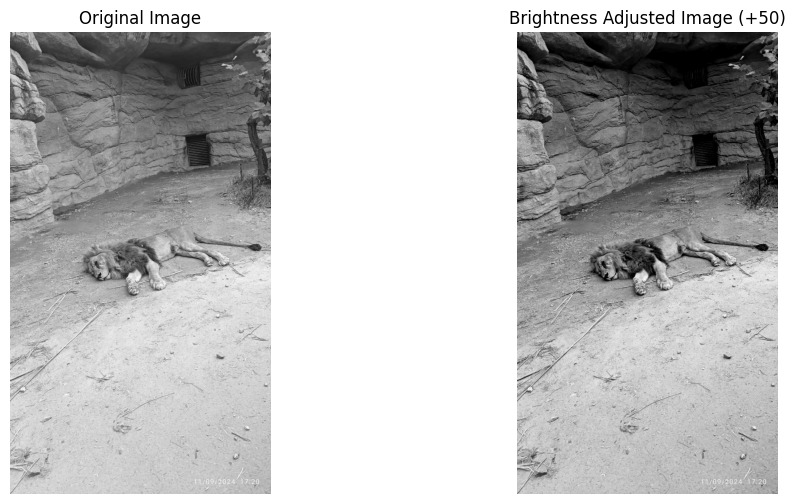

In [5]:
import matplotlib.pyplot as plt
def adjust_brightness(image, adjustment):
    # Get image size
    width, height = image.size

    # Create a new image for the adjusted result
    adjusted_image = Image.new('L', (width, height))

    # Loop over every pixel and adjust its brightness
    for y in range(height):
        for x in range(width):
            # Get the pixel value
            pixel = image.getpixel((x, y))
            # Adjust the brightness and ensure it's in the range [0, 255]
            adjusted_pixel = max(0, min(255, pixel + adjustment))
            # Set the new pixel value in the adjusted image
            adjusted_image.putpixel((x, y), adjusted_pixel)

    return adjusted_image

brighter_image = adjust_brightness(img, -50)

# Plot the original and adjusted images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Brightness-adjusted image
axes[1].imshow(brighter_image, cmap='gray')
axes[1].set_title("Brightness Adjusted Image (+50)")
axes[1].axis('off')

plt.show()


**--6C--**

In [6]:
def rotate_180(image_data, width, height):
    # Rotate 180 degrees: reverse both rows and the elements in each row
    rotated_data = []
    for row in image_data[::-1]:  # Reverse the row order
        rotated_data.append(row[::-1])  # Reverse each row to flip the pixels horizontally
    return rotated_data, width, height


def save_pgm(filename, width, height, pixel_data, magic_number):
    with open(filename, 'wb') as f:
        # Write the magic number, width, height, and max grayscale value
        f.write(magic_number + b'\n')
        f.write(f"{width} {height}\n".encode())
        f.write(b'255\n')

        # Flatten the 2D list (pixel_data) into a 1D list
        flattened_data = [pixel for row in pixel_data for pixel in row]

        # Convert the flattened list to a bytearray and write it to the file
        f.write(bytearray(flattened_data))


In [10]:
image1_path = "input.pgm"

# Correct unpacking of the returned values
data1, width1, height1, magic1 = load_pgm_image(image1_path)

# Rotate the image by 180 degrees (not 90 degrees)
rotated_data, new_width, new_height = rotate_180(data1, width1, height1)

# Save the rotated image as image2.pgm
image2_path = 'image2.pgm'
save_pgm(image2_path, new_width, new_height, rotated_data, magic1)

# Read the rotated image to verify
data2, width2, height2, magic2 = load_pgm_image(image2_path)
print(f"Image rotated and saved as {image2_path}")
print(f"New dimensions: {width2}x{height2}")


Image rotated and saved as image2.pgm
New dimensions: 721x1280


Blended image saved as blended_output.pgm


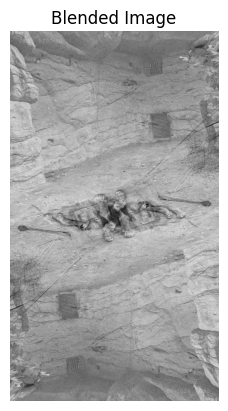

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def load_pgm_image(filename):
    with open(filename, 'rb') as f:
        # Read the first line and confirm it's a PGM file (magic number is a byte string)
        magic_number = f.readline().strip()
        if magic_number != b'P5':
            raise ValueError("Not a valid PGM file (must be binary P5 format).")

        # Read any comment lines starting with '#'
        line = f.readline().strip()
        while line.startswith(b'#'):
            line = f.readline().strip()

        # Now, line should contain the width and height
        width, height = [int(i) for i in line.split()]

        # Read max grayscale value
        max_val = int(f.readline().strip())

        # Read pixel data
        pixels = []
        for y in range(height):
            row = []
            for x in range(width):
                pixel = ord(f.read(1))  # Read one byte at a time
                row.append(pixel)
            pixels.append(row)

    return pixels, width, height, magic_number

def blend_images(data1, data2, c):
    # Blend two images pixel-by-pixel with the coefficient c
    blended_data = []
    for row1, row2 in zip(data1, data2):
        blended_row = []
        for pixel1, pixel2 in zip(row1, row2):
            blended_pixel = int(c * pixel1 + (1 - c) * pixel2)
            # Clamp to valid grayscale range (0-255)
            blended_pixel = max(0, min(255, blended_pixel))
            blended_row.append(blended_pixel)
        blended_data.append(blended_row)
    return blended_data

def save_pgm(filename, width, height, pixel_data, magic_number):
    with open(filename, 'wb') as f:
        f.write(magic_number + b'\n')
        f.write(f"{width} {height}\n".encode())
        f.write(b'255\n')

        # Flatten 2D list to 1D and convert to bytearray
        flattened_data = [pixel for row in pixel_data for pixel in row]
        f.write(bytearray(flattened_data))

# Load both images

data1, width1, height1, magic1 = load_pgm_image(image1_path)
data2, width2, height2, magic2 = load_pgm_image(image2_path)

# Ensure both images are compatible
if (width1, height1) != (width2, height2):
    raise ValueError("Images must have the same dimensions")
if magic1 != magic2:
    raise ValueError("Images must have the same PGM format")

# Set blending coefficient
c = 0.5  # Blend equally between two images, change as needed

# Blend the images
blended_data = blend_images(data1, data2, c)

# Save the blended image
output_path = "blended_output.pgm"
save_pgm(output_path, width1, height1, blended_data, magic1)
print(f"Blended image saved as {output_path}")

# Display the saved image
img = mpimg.imread(output_path)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Blended Image")
plt.show()
